Fase 1: Exploración y Limpieza
1. Exploración Inicial:Realiza una exploración inicial de los datos para identificar posibles problemas, 
como valores nulos, atípicos o datos faltantes en las columnas relevantes
2. Limpieza de Datos


In [1]:
#importar librerias necesarias:

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
#cargo CSV "Customer Flight Activity" y veo la información de sus columnas

tabla_datos1= pd.read_csv("Customer Flight Activity.csv",sep=',')
tabla_datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [3]:
#Verifico numero de columnas y filas del csv1 "Customer Flight Activity"

tabla_datos1.shape

(405624, 10)

In [4]:
# Creo bucle for para que itere por todas las columnas y saque los valores únicos de cada una.

for column in tabla_datos1.columns:
  
    print(f"Columna: {column}")
    print(tabla_datos1[column].unique())

    print("\n--------------------\n")

Columna: Loyalty Number
[100018 100102 100140 ... 999731 999788 999891]

--------------------

Columna: Year
[2017 2018]

--------------------

Columna: Month
[ 1  9  2  3 11  4  5  7  6  8 10 12]

--------------------

Columna: Flights Booked
[ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]

--------------------

Columna: Flights with Companions
[ 0  4  7  1  6  3  5  2 10  8  9 11]

--------------------

Columna: Total Flights
[ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]

--------------------

Columna: Distance
[1521 2030 1200 ... 1217  617 4135]

--------------------

Columna: Points Accumulated
[152.   203.   120.   ...  18.75 601.   626.  ]

--------------------

Columna: Points Redeemed
[  0 341 364 310 445 312 343 366 389 292 447 324 456 409 436 327 322 291
 323 300 290 309 325 386 321 363 340 670 443 517 444 328 344 367 313 333
 293 449 297 455 372 356 405 381 466 419 369 352 482 335 329 305 415 396
 31

In [5]:
# verifico los valores nulos de cada columna:
tabla_datos1.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [6]:
#Elimino las comas y cambio a int la columna "Points Accumulated"

tabla_datos1['Points Accumulated']=tabla_datos1['Points Accumulated'].astype(int)
tabla_datos1['Points Accumulated']=tabla_datos1['Points Accumulated'].replace(",","")


In [7]:
#cargo CSV "Customer Loyalty History" y veo la información de sus columnas

tabla_datos2= pd.read_csv("Customer Loyalty History.csv", sep=',')
tabla_datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [8]:
#Verifico numero de columnas y filas del csv2 "Customer Loyalty History"

tabla_datos2.shape

(16737, 16)

In [9]:
tabla_datos2.sample(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
10642,613747,Canada,Quebec,Montreal,H2Y 2W2,Male,Bachelor,101933.0,Married,Star,2471.53,Standard,2016,8,NaN,NaN
8558,672781,Canada,Ontario,Toronto,M2M 7K8,Female,Bachelor,82876.0,Married,Nova,9463.11,Standard,2017,4,NaN,NaN
8809,144402,Canada,Ontario,Toronto,P1J 8T7,Male,College,NaN,Single,Nova,10915.36,Standard,2017,4,NaN,NaN
6080,290109,Canada,New Brunswick,Fredericton,E3B 2H2,Female,College,NaN,Divorced,Nova,16468.22,2018 Promotion,2018,3,NaN,NaN
10394,110422,Canada,Nova Scotia,Halifax,B3J 9S2,Male,College,NaN,Single,Star,2414.77,Standard,2018,1,NaN,NaN
12295,750688,Canada,Ontario,Thunder Bay,K8T 5M5,Female,Bachelor,54794.0,Married,Star,3528.04,Standard,2013,10,NaN,NaN
10826,335852,Canada,Newfoundland,St. John's,A1C 6H9,Female,College,NaN,Married,Star,2510.63,Standard,2015,9,NaN,NaN
6704,997008,Canada,Ontario,Toronto,M2P 4F6,Female,Bachelor,72888.0,Married,Nova,5479.56,Standard,2012,10,NaN,NaN
7606,574745,Canada,Quebec,Montreal,H2Y 4R4,Female,Bachelor,50433.0,Married,Nova,7367.65,Standard,2012,4,NaN,NaN
10526,828735,Canada,Quebec,Montreal,H2Y 4R4,Female,Bachelor,66388.0,Single,Star,2449.32,Standard,2016,10,NaN,NaN


In [10]:
# Creo bucle for para que itere por todas las columnas y saque los valores únicos de cada una.

for column in tabla_datos2.columns:
  
    print(f"Columna: {column}")
    print(tabla_datos2[column].unique())

    print("\n--------------------\n")

Columna: Loyalty Number
[480934 549612 429460 ... 776187 906428 652627]

--------------------

Columna: Country
['Canada']

--------------------

Columna: Province
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

--------------------

Columna: City
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']

--------------------

Columna: Postal Code
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E3B 2H2' 'M1R 4K3' 'T9G 1W3' 'H2Y 4R4' 'V5R 1W3' 'P1L 8X8'
 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'H2T 2J6' 'T3E 2V9'

In [11]:
# verifico los valores nulos de cada columna:

tabla_datos2.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [12]:
#sacamos el porcentaje de nulos, para poder tomar decisiones al respecto:

ver_nulos=(tabla_datos2.isnull().sum()/tabla_datos2.shape[0])*100
ver_nulos

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [13]:
 # Eliminamos los valores negativos de la columna Salary, dando por hecho que es un error ortográfico y supliendo por el mismo valor en positivo

tabla_datos2['Salary'] = tabla_datos2['Salary'].astype(str).str.replace('-','' )


In [14]:
#Vuelvo a convertir la columna 'Salary en float

tabla_datos2['Salary'] = pd.to_numeric(tabla_datos2['Salary'], errors='coerce') 

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

Ya que tenemos un alto porcentaje en valores nulos en las columnas 'Salary', 'Cancellation Year' y 'Cancellation Month', vamos a aplicar la técnica Iterative Imputer, 
donde el imputador "adivina" los valores faltantes en función de las relaciones observadas en los datos completos.

In [16]:
# instanciamos las clases

imputer_iterative = IterativeImputer(max_iter = 200, random_state = 40)

# ajustamos y tranformamos los datos

imputer_iterative_imputado = imputer_iterative.fit_transform(tabla_datos2[["Salary", "Cancellation Year", "Cancellation Month"]])

# comprobamos que es lo que nos devuelve, que en este caso es un array también

imputer_iterative_imputado

array([[8.32360000e+04, 2.01650226e+03, 6.95925904e+00],
       [7.93593409e+04, 2.01650314e+03, 6.96271882e+00],
       [7.93593429e+04, 2.01800000e+03, 1.00000000e+00],
       ...,
       [7.93593409e+04, 2.01650314e+03, 6.96271882e+00],
       [5.72970000e+04, 2.01650815e+03, 6.98240867e+00],
       [7.50490000e+04, 2.01600000e+03, 8.00000000e+00]])

In [17]:
#creamos tres nuevas columnas donde aplicaremos esta técica anterior:

tabla_datos2[["Salary_iterative", "Cancellation Year_iterative", "Cancellation Month_iterative"]] = imputer_iterative_imputado

In [18]:
#Vuelvo a sacar el porcentaje de nulos, para verificar que ha funcionado la técnica:

ver_nulos2=(tabla_datos2.isnull().sum()/tabla_datos2.shape[0])*100
ver_nulos2

Loyalty Number                   0.000000
Country                          0.000000
Province                         0.000000
City                             0.000000
Postal Code                      0.000000
Gender                           0.000000
Education                        0.000000
Salary                          25.321145
Marital Status                   0.000000
Loyalty Card                     0.000000
CLV                              0.000000
Enrollment Type                  0.000000
Enrollment Year                  0.000000
Enrollment Month                 0.000000
Cancellation Year               87.650117
Cancellation Month              87.650117
Salary_iterative                 0.000000
Cancellation Year_iterative      0.000000
Cancellation Month_iterative     0.000000
dtype: float64

In [19]:
#Primero saco los valores estadísticos principales, para verificar que no modifica mucho la estadística tras aplicar la técnica Iterative Imputer:

tabla_datos2.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary_iterative,Cancellation Year_iterative,Cancellation Month_iterative
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000,16737.000000,16737.000000,16737.000000
mean,549735.880445,79359.340907,7988.896536,2015.253211,6.669116,2016.503145,6.962748,79359.340908,2016.503137,6.962719
std,258912.132453,34749.691464,6860.982280,1.979111,3.398958,1.380743,3.455297,30029.311812,0.485166,1.214277
min,100018.000000,9081.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000,9081.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000,63899.000000,2016.501796,6.957610
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000,79359.340908,2016.503137,6.962719
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000,82940.000000,2016.507383,6.979559
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000,407228.000000,2018.000000,12.000000


In [20]:
#Eliminamos las columnas 'Salary', 'Cancellation Year' y 'Cancellation Month', ya que nos quedamos con las columnas que hemos creado nuevas con los valores completos:
tabla_datos2.drop(columns=["Salary", "Cancellation Year", "Cancellation Month"],axis = 1,inplace=True)

In [21]:
tabla_datos1.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [22]:
tabla_datos2.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Marital Status', 'Loyalty Card', 'CLV',
       'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Salary_iterative', 'Cancellation Year_iterative',
       'Cancellation Month_iterative'],
      dtype='object')

In [23]:
#Unir los dos Dataframe (tabla_datos1 y tabla_datos2)

datos_unidos=pd.merge(left=tabla_datos1,right=tabla_datos2)

#Vemos las 5 primeras filas de la nueva tabla:

datos_unidos.sample(20)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Salary_iterative,Cancellation Year_iterative,Cancellation Month_iterative
256313,728085,2018,5,0,0,0,0,0,0,0,Canada,Quebec,Montreal,H2T 9K8,Male,Bachelor,Single,Nova,2955.50,Standard,2014,2,73252.000000,2016.504525,6.968169
236583,678284,2018,2,4,0,4,1304,140,0,0,Canada,Nova Scotia,Halifax,B3C 2M8,Female,College,Single,Star,1918.12,Standard,2018,6,79359.340908,2016.503137,6.962719
259215,735263,2018,3,8,0,8,1272,158,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,College,Single,Nova,18892.20,Standard,2016,5,79359.340908,2016.503137,6.962719
13463,132296,2018,12,0,0,0,0,0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Female,Bachelor,Divorced,Star,2491.32,Standard,2013,1,58711.000000,2016.507828,6.981147
285791,800499,2018,12,2,2,4,3868,386,0,0,Canada,New Brunswick,Fredericton,E3B 2H2,Female,Bachelor,Divorced,Star,10676.59,2018 Promotion,2018,2,72526.000000,2016.504690,6.968817
136840,707967,2018,2,10,0,10,2750,297,0,0,Canada,British Columbia,Vancouver,V1E 4R6,Male,Master,Divorced,Star,9029.71,Standard,2014,5,92359.000000,2016.500184,6.951117
215561,624528,2018,6,0,0,0,0,0,0,0,Canada,Ontario,Toronto,P1L 8X8,Male,Doctor,Married,Star,8693.63,Standard,2013,9,141278.000000,2015.000000,1.000000
161295,489956,2018,3,3,2,5,2075,223,569,46,Canada,Saskatchewan,Regina,S6J 3G0,Male,Bachelor,Married,Star,5470.06,Standard,2012,12,71792.000000,2016.504857,6.969472
348234,965079,2018,7,17,5,22,1408,140,0,0,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,Married,Star,10010.14,Standard,2016,5,80474.000000,2016.502884,6.961724
92236,323341,2017,5,0,0,0,0,0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,31934.62,Standard,2015,7,73262.000000,2016.000000,3.000000


In [24]:
# Convertimos todos los nombres de las columnas a minúsculas:

datos_unidos.columns = [column.lower() for column in datos_unidos.columns]

In [25]:
datos_unidos.columns

Index(['loyalty number', 'year', 'month', 'flights booked',
       'flights with companions', 'total flights', 'distance',
       'points accumulated', 'points redeemed', 'dollar cost points redeemed',
       'country', 'province', 'city', 'postal code', 'gender', 'education',
       'marital status', 'loyalty card', 'clv', 'enrollment type',
       'enrollment year', 'enrollment month', 'salary_iterative',
       'cancellation year_iterative', 'cancellation month_iterative'],
      dtype='object')

In [26]:
def quitar_espacios(df):
    # Aquí convertimos los nombres de las columnas en minúsculas
    
    df.columns = [column.replace(" ","_") for column in df.columns]
    
    # Modificamos los nombres de las columnas para mejor comprensión lectora añadiendo un '_'
   
    

    return df
datos = quitar_espacios(datos_unidos) # Llamamos nuestra función

Fase 2: Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las 
siguientes gráficas usando la mejor gráfica que consideres:

3. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [27]:
#vemos de nuevo nuestros datos:

datos_unidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loyalty_number                405624 non-null  int64  
 1   year                          405624 non-null  int64  
 2   month                         405624 non-null  int64  
 3   flights_booked                405624 non-null  int64  
 4   flights_with_companions       405624 non-null  int64  
 5   total_flights                 405624 non-null  int64  
 6   distance                      405624 non-null  int64  
 7   points_accumulated            405624 non-null  int32  
 8   points_redeemed               405624 non-null  int64  
 9   dollar_cost_points_redeemed   405624 non-null  int64  
 10  country                       405624 non-null  object 
 11  province                      405624 non-null  object 
 12  city                          405624 non-nul

In [28]:
# Aprupo por mes y año y sumo la cantidad de vuelos reservados de cada agrupación:

vuelos_año = datos_unidos.groupby(['year','month'])['flights_booked'].sum()
# creo un nuevo dataframe con los resultados obtenidos

vuelos = vuelos_año.reset_index()
vuelos

,year,month,flights_booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


In [29]:
# Creo variable para los datos de vuelos únicamente de 2017:

vuelos_año_2017 = datos_unidos[datos_unidos['year'] == 2017]

# Agrupo los datos de vuelos de 2017 por mes:

vuelos_mes_2017 = vuelos_año_2017.groupby('month')['flights_booked'].sum()

# Creo un nuevo dataframe con los resultados obtenidos

vuelos_2017 = vuelos_mes_2017.reset_index()
vuelos_2017

,month,flights_booked
0,1,47766
1,2,47691
2,3,64271
3,4,55720
4,5,65279
5,6,80493
6,7,89288
7,8,78692
8,9,63304
9,10,60351


<Axes: xlabel='month', ylabel='flights_booked'>

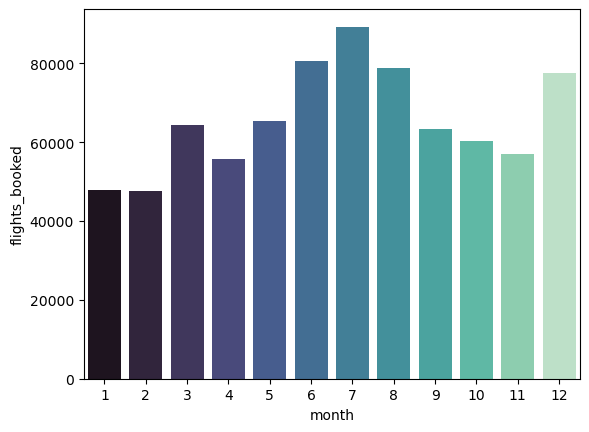

In [30]:
#importo librerias de visualizacion:

import matplotlib.pyplot as plt
import seaborn as sns

#Vsualizo vuelos 2017 en gráfico barplot:

sns.barplot(x='month',y='flights_booked',data=vuelos_2017,palette='mako')

In [31]:
# Creo variable para los datos de vuelos únicamente de 2018:

vuelos_año_2018 = datos_unidos[datos_unidos['year'] == 2018]

# Agrupo los datos de vuelos de 2017 por mes:

vuelos_mes_2018 = vuelos_año_2018.groupby('month')['flights_booked'].sum()

# Creo un nuevo dataframe con los resultados obtenidos

vuelos_2018 = vuelos_mes_2018.reset_index()
vuelos_2018

,month,flights_booked
0,1,49170
1,2,48643
2,3,66928
3,4,56791
4,5,76891
5,6,92749
6,7,104143
7,8,90512
8,9,73075
9,10,69110


<Axes: xlabel='month', ylabel='flights_booked'>

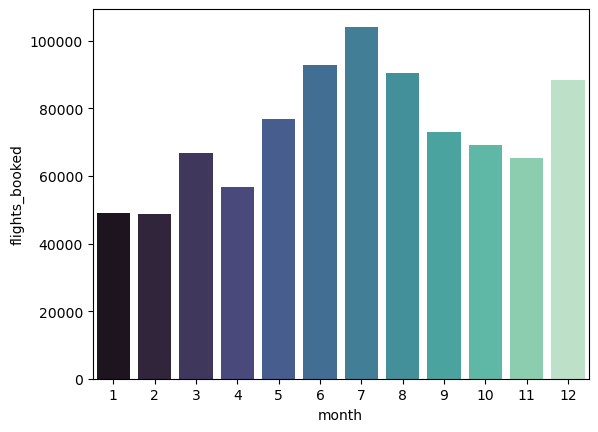

In [32]:
#Vsualizo vuelos 2018 en gráfico barplot:

sns.barplot(x='month',y='flights_booked',data=vuelos_2018,palette='mako')

4. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los 
clientes?

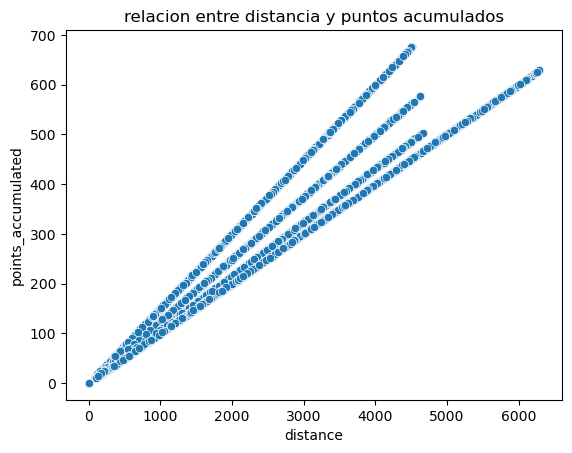

In [33]:
#Vsualizo vuelos 2017 en gráfico scatterplot:

sns.scatterplot(x='distance', y='points_accumulated', data= datos_unidos)

plt.xlabel('distance')
plt.ylabel('points_accumulated')
plt.title("relacion entre distancia y puntos acumulados");

Según este gráfico que se utiliza para ver si hay relación entre ambas variables, parece que si hay relación, crecen a la vez.

5. ¿Cuál es la distribución de los clientes por provincia o estado?

Text(0.5, 1.0, 'Clientes por provincia')

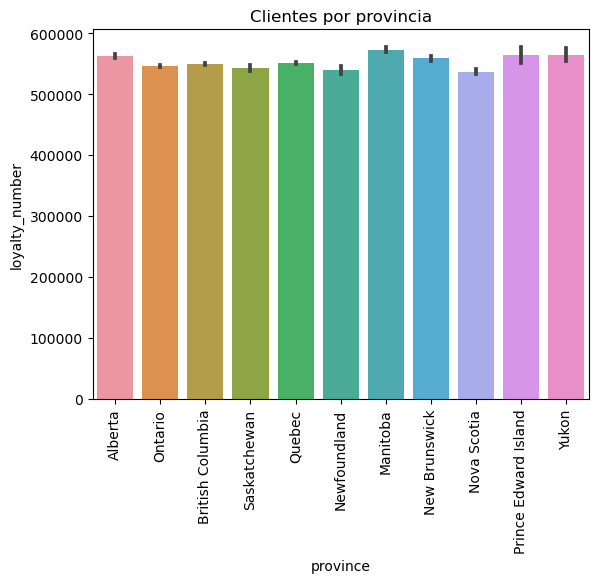

In [34]:
#Visualizo por medio de un barplot:
sns.barplot(x='province', y='loyalty_number', data=datos_unidos)
plt.xticks(rotation = 90)
plt.title("Clientes por provincia")

Text(0.5, 1.0, 'Clientes por provincia')

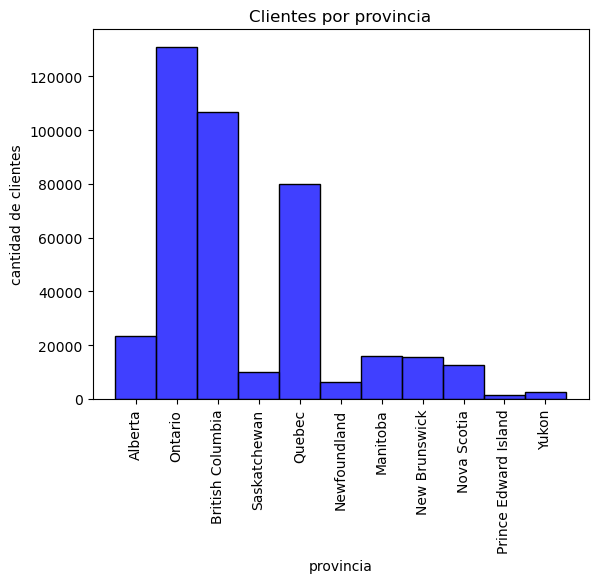

In [35]:
sns.histplot(data=datos_unidos, x="province", bins=10, kde=False, color="blue")
plt.xlabel('provincia')
plt.ylabel('cantidad de clientes')
plt.xticks(rotation = 90)
plt.title("Clientes por provincia")

Según los gráficos la provincia de la que son más clientes es Ontario

6. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los 
clientes?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Bachelor'),
  Text(1, 0, 'College'),
  Text(2, 0, 'Doctor'),
  Text(3, 0, 'High School or Below'),
  Text(4, 0, 'Master')])

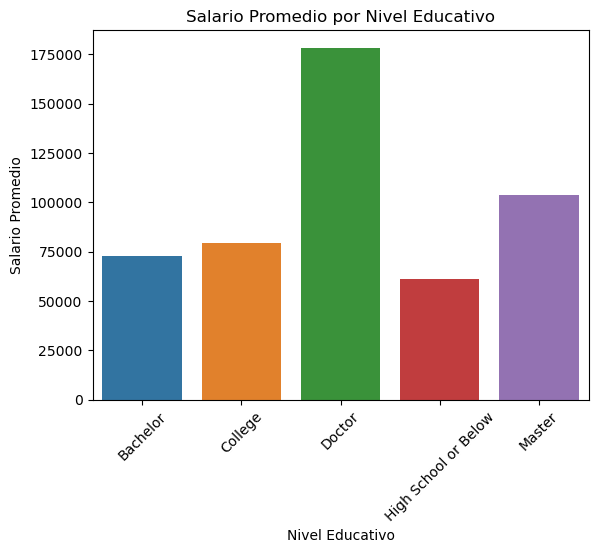

In [36]:
# Vemos el salario promedio por nivel educativo:

salario_promedio = datos_unidos.groupby('education')['salary_iterative'].mean().reset_index()

#Visualizo por medio de un barplot:

sns.barplot(x='education', y='salary_iterative', data=salario_promedio)
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.title('Salario Promedio por Nivel Educativo')
plt.xticks(rotation=45)

Según el gráfico, se puede verificar que cuanto más nivel educativo, el salario también es mayor, por lo que están directamente relacionados.

7. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [37]:
# Agrupo por tipo de tarjeta y cuento el numero de clientes de las agrupaciones obtenidas:

clientes_tipo_tarjeta = datos_unidos.groupby('loyalty_card')["loyalty_number"].count()

# creo un nuevo dataframe con los resultados obtenidos

clientes_card = clientes_tipo_tarjeta.reset_index()
clientes_card

,loyalty_card,loyalty_number
0,Aurora,83832
1,Nova,137568
2,Star,184224


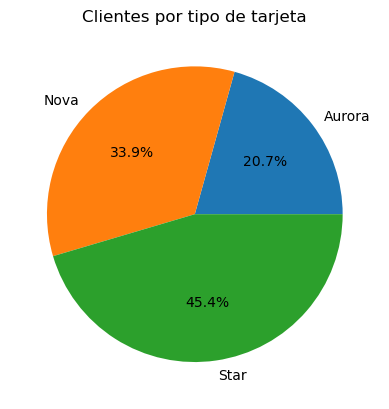

In [38]:
#Visualizo datos por medio de un Pieplot, con el podemos ver las proporciones:

plt.pie("loyalty_number", labels= "loyalty_card",autopct=  '%1.1f%%',data = clientes_card )
plt.title('Clientes por tipo de tarjeta');

La tarjeta Star es la más utilizada con un 45,4%, seguida de la tarjeta Nova con un 33,9% y por último y por tanto menos utilizada es la tarjeta Aurora con un 20,7%

8. ¿Cómo se distribuyen los clientes según su estado civil y género?

Las tablas de contingencia, también conocidas como tablas de cruce o tablas de frecuencia cruzada, son una herramienta fundamental en el análisis de datos categóricos.
Estas tablas permiten resumir y visualizar la relación entre dos o más variables categóricas.
Para calcular estas tablas de contingencia usaremos el método pd.crosstab()

In [41]:
# Agrupo por gender y estado civil:

recuento_clientes = datos_unidos.groupby('gender')["marital_status"].count()

# Creo variable para los datos de genero femenino únicamente:

clientes_female = datos_unidos[datos_unidos['gender'] == 'female'].reset_index()

In [43]:
#Creo variable para los datos de genero femenino únicament

clientes_male = datos_unidos[datos_unidos['gender'] == 'male'].reset_index()

In [ ]:
# creo 2 gráficos con el resultado de cada agrupación:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

sns.barplot(x = "marital_status",
            y = "loyalty_number" ,
            data = clientes_female, 
            ax = axes[0], 
            palette= "mako")
axes[0].set_title('clientes femeninos')

# hacemos lo mismo para el violinplot
sns.barplot(x = "marital_status",
            y = "loyalty_number", 
            data = clientes_male, 
            ax = axes[0], 
            palette= "magma")
axes[1].set_title('clientes masculinos')

In [58]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(datos_unidos['marital_status'], datos_unidos['gender'])
# Mostrar la tabla de contingencia
tabla_contingencia

gender,Female,Male
marital_status,,
Divorced,30888,30288
Married,117816,117984
Single,54936,53712


Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Objetivo del Ejercicio:

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias 
significativas en el número de vuelos reservados según el nivel educativo de los clientes. 

Para ello, los pasos que deberas seguir son:

9. Preparación de Datos:

Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 
'Flights Booked' y 'Education'.

In [59]:
vuelos_nivel_educativo = datos_unidos[['flights_booked', 'education']]
vuelos_nivel_educativo

,flights_booked,education
0,3,Bachelor
1,2,Bachelor
2,6,Bachelor
3,4,Bachelor
4,0,Bachelor
...,...,...
405619,0,Bachelor
405620,0,Bachelor
405621,0,Bachelor
405622,0,Bachelor


10. Análisis Descriptivo:

Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas 

(como el promedio, la desviación estandar, los percentiles) del número de vuelos 

reservados para cada grupo.

In [64]:
#Agrupo los datos por nivel educativo:

nivel_educativo = datos_unidos.groupby('education')["flights_booked"].describe().reset_index()

nivel_educativo

,education,count,mean,std,min,25%,50%,75%,max
0,Bachelor,253752.0,4.091093,5.216995,0.0,0.0,1.0,8.0,21.0
1,College,102672.0,4.153012,5.242136,0.0,0.0,1.0,8.0,21.0
2,Doctor,17856.0,4.146281,5.250093,0.0,0.0,1.0,8.0,21.0
3,High School or Below,19008.0,4.155777,5.234551,0.0,0.0,1.0,8.0,21.0
4,Master,12336.0,4.184014,5.210294,0.0,0.0,1.0,8.0,21.0


Prueba Estadística:

Realiza una prueba de A/B testing para determinar si existe una diferencia 

significativa en el número de vuelos reservados entre los diferentes niveles 
educativos.
